<a href="https://colab.research.google.com/github/Tina-Mulu/K-Means-Clustering-and-Hierarchial-Clustering/blob/main/Unsupervised_learning_(Decision_Trees_and_Random_Forests_on_clicking_on_an_Advert_(R).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the question**

A Kenyan entrepreneur has created an online cryptography course and would want to advertise it on her blog. She currently targets audiences originating from various countries. In the past, she ran ads to advertise a related course on the same blog and collected data in the process. She would now like to employ your services as a Data Science Consultant to help her identify which individuals are most likely to click on her ads.

We will create a supervised learning model to help identify which individuals are most likely to click on the ads in the blog. 

# **2. Metrics for success**

Predicting which age of people most likely click the advert and their daily internet usage hence determining how the different variables relate to clicking the advert.

# **3. Experimental design**

R was used for the analysis , univariate and bivariate analysis will be done on the data .

In [28]:
library("data.table")


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [29]:
data <- fread('advertising.csv')
head(data)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


# **4. Data cleaning**

In [30]:
# Dealing with missing data
is.na(data)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [31]:
colSums(is.na(data))
# our data does not have missing values

Daily Time Spent on Site                      Age              Area Income 
                       0                        0                        0 
    Daily Internet Usage            Ad Topic Line                     City 
                       0                        0                        0 
                    Male                  Country                Timestamp 
                       0                        0                        0 
           Clicked on Ad 
                       0

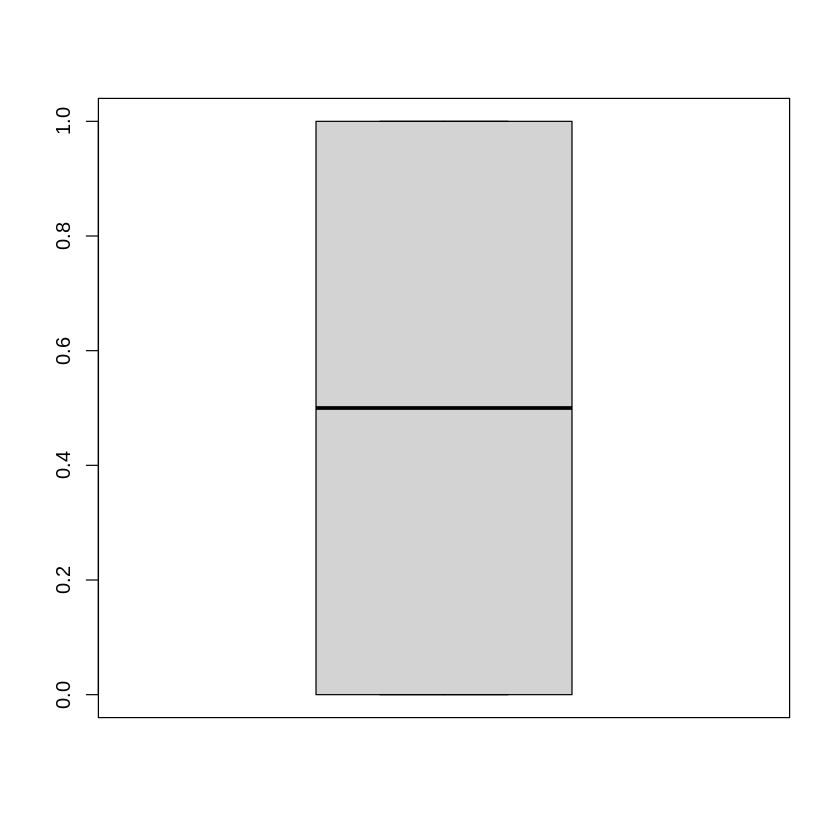

In [32]:
# dealing with outliers
boxplot(data$`Clicked on Ad`)
# no outliers

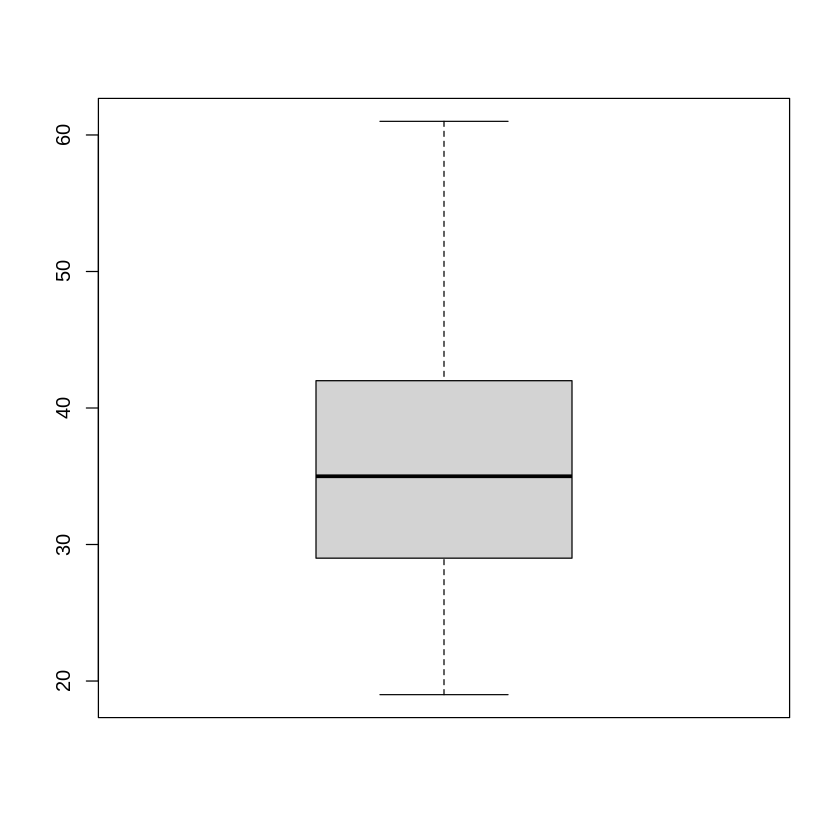

In [ ]:
boxplot(data$Age)
# no outliers in the age column

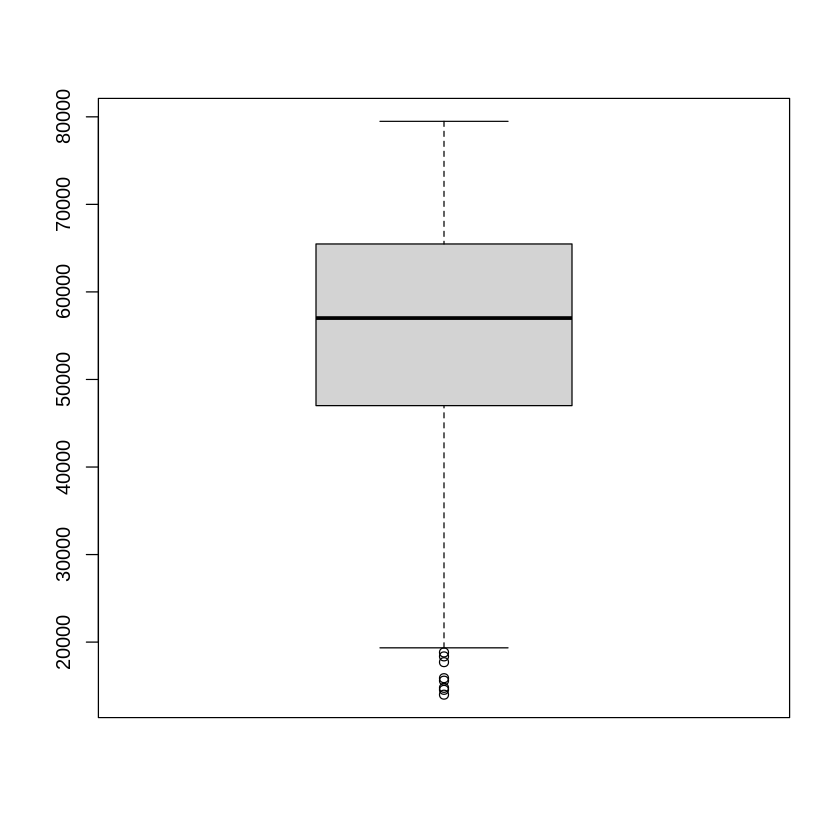

In [ ]:
boxplot(data$`Area Income`)

# just a few outliers detected on the area income. but they will not be dropped

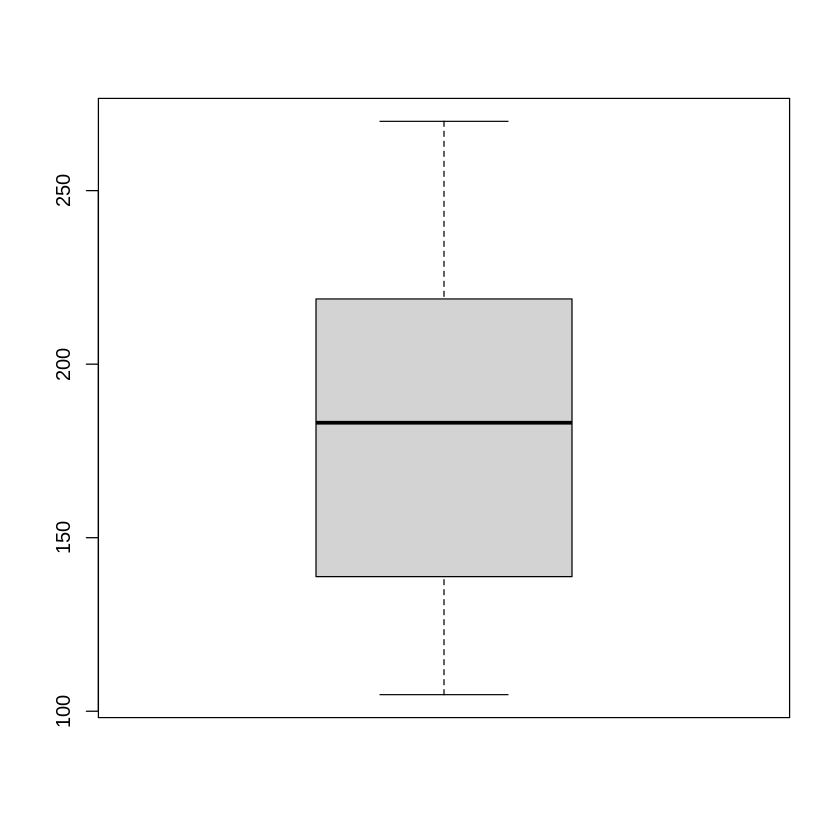

In [ ]:
boxplot(data$`Daily Internet Usage`)
# no outliers detected

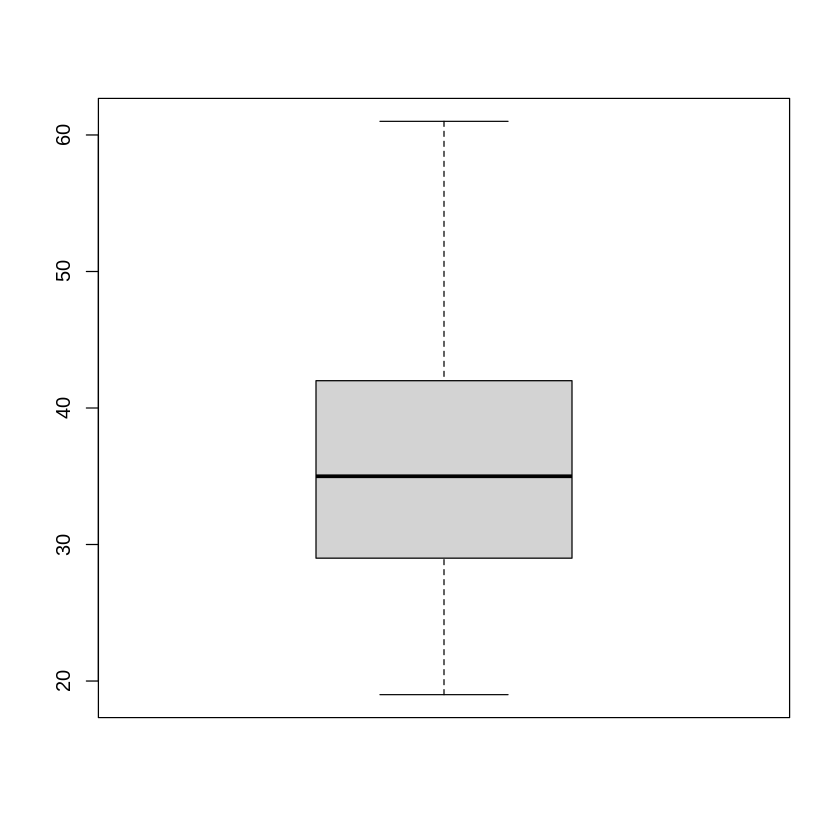

In [ ]:
boxplot(data$Age)
#  no outliers detected

In [ ]:
#checking for duplicates
duplicated_rows <- data[duplicated(data),]

# Lets print out the variable duplicated_rows and see these duplicated rows
duplicated_rows

# there are no duplicates in the dataset

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>


#5.  **Univariate data analysis**

In [ ]:
#mean on the number of ad clicks
ad.dist.mean <- mean(data$`Clicked on Ad`)

# Printing out

ad.dist.mean

[1] 0.5

In [ ]:
age.dist.mean <- mean(data$Age)
age.dist.mean

# the median age of the sample used was 36.009

[1] 36.009

In [ ]:
time.dist.mean <- mean(data$`Daily Time Spent on Site`)
time.dist.mean

# the average time spent on the site was 65.002 

[1] 65.0002

In [ ]:
#median on the ad clicks
ad.dist.median <- median(data$`Clicked on Ad`)

# Printing out

ad.dist.median

[1] 0.5

In [ ]:
# the median time spent on site
time.dist.median <- median(data$`Daily Time Spent on Site`)
time.dist.median

# the  median time spent on site was 68.125

[1] 68.215

In [ ]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Calculating the mode using out getmode() function
# ---
#
ad.dist.mode <- getmode(data$`Clicked on Ad`)

# Then printing out ad.dist.mode 
# ---
ad.dist.mode

# majority of the people might not click on the ad

[1] 0

In [ ]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Calculating the mode using out getmode() function
# ---
#
age.dist.mode <- getmode(data$Age)

# Then printing out athletes.dist.mode 
# ---
age.dist.mode

# the modal age for the sample was 31

[1] 31

In [ ]:
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

# Calculating the mode using out getmode() function
# ---
#
income.dist.mode <- getmode(data$`Area Income`)

# Then printing out athletes.dist.mode 
# ---
income.dist.mode

[1] 61833.9

**Measures of dispersion**

In [ ]:
#Find the minimum element of the ad clicks using the min() function
# ---
# OUR CODE GOES BELOW
# 
data.dist.min <- min(data$`Clicked on Ad`)

# And then printing athletes.dist.min to show the minimum element
# 
data.dist.min

[1] 0

In [ ]:
#minimum time spent on site
time.dist.min <- min(data$`Daily Time Spent on Site`)
time.dist.min

[1] 32.6

In [ ]:
# maximum 
data.dist.max <- max(data$`Clicked on Ad`)

# And then printing athletes.dist.min to show the minimum element
# 
data.dist.max

[1] 1

In [ ]:
#maximum time spent on site
time.dist.max <- max(data$`Daily Time Spent on Site`)
time.dist.max

# the maximum time spent on site was 91.43

[1] 91.43

In [ ]:
range.dist.max <- range(data$`Clicked on Ad`)

# And then printing athletes.dist.min to show the minimum element
# 
range.dist.max

[1] 0 1

In [ ]:
range.dist.max <- range(data$`Daily Time Spent on Site`)
range.dist.max

[1] 32.60 91.43

In [ ]:
data.dist.quantile <- quantile(data$`Clicked on Ad`)
data.dist.quantile 


0%  25%  50%  75% 100% 
 0.0  0.0  0.5  1.0  1.0

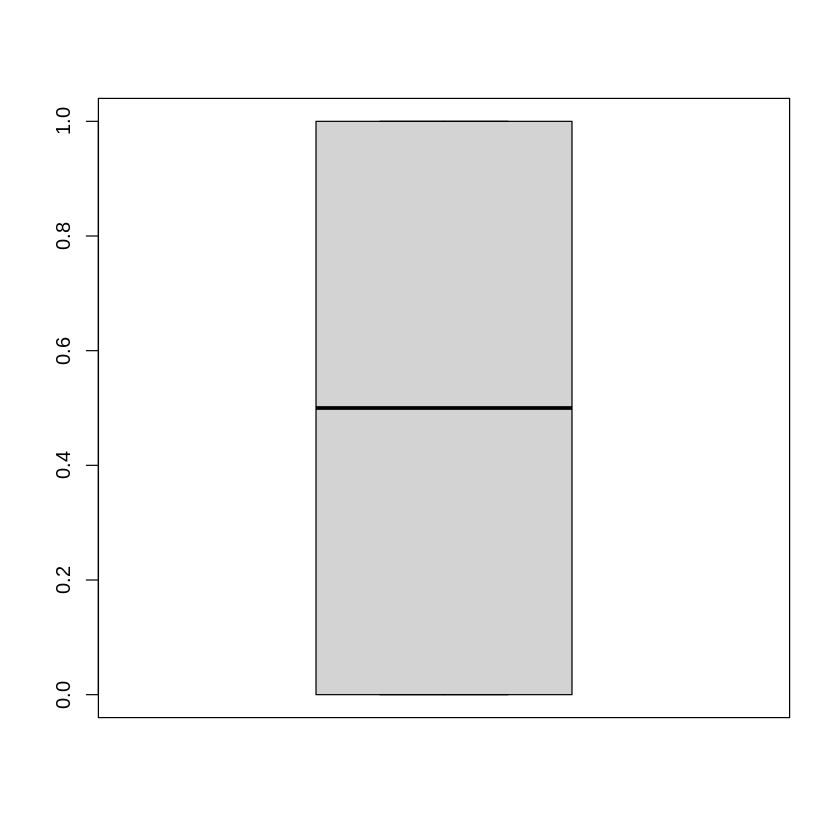

In [ ]:
boxplot(data$`Clicked on Ad`)

In [ ]:
#school <- painters$School

# Applying the table() function will compute the frequency distribution of the School variable
# ---
# 
school_frequency <- table(school)

In [ ]:
# Fetching the clicked on Ad column
# ---
# 
adv <- data$`Clicked on Ad`

# Applying the table() function will compute the frequency distribution of the Clicked on Ad variable
# ---
# 
adv_frequency <- table(adv)
adv_frequency

adv
  0   1 
500 500 

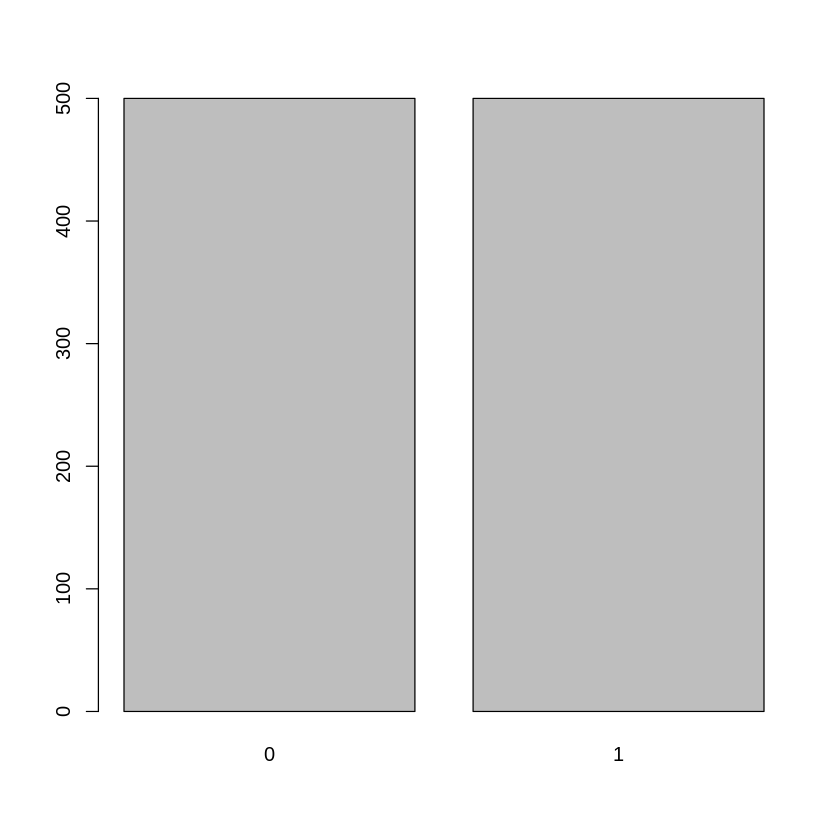

In [ ]:
barplot(adv_frequency)

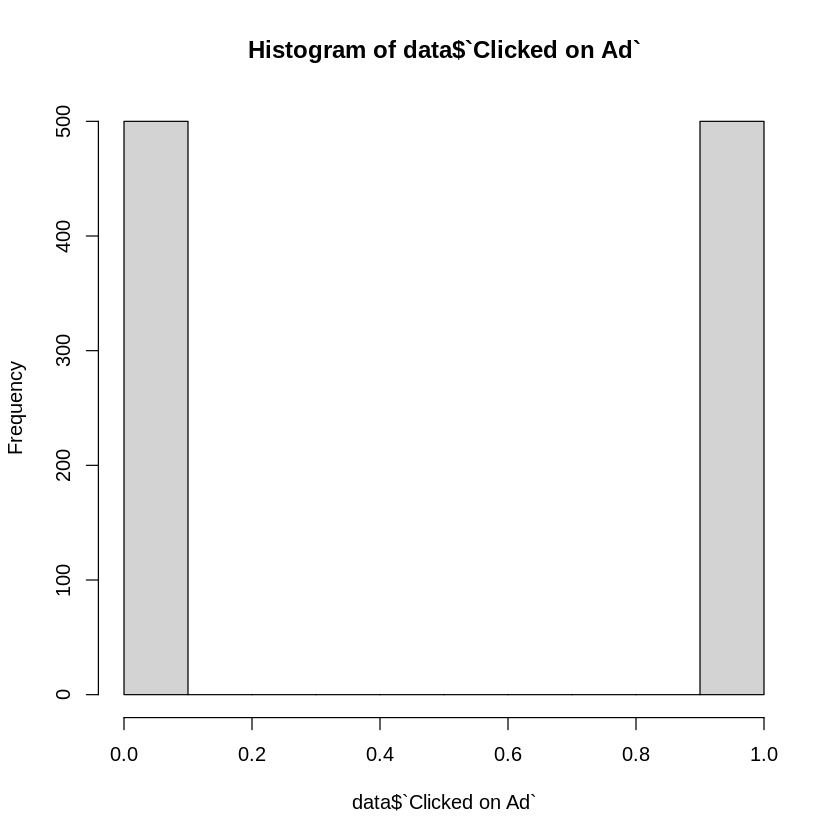

In [ ]:
# plotting histogram table on clicked ads

hist(data$`Clicked on Ad`)

# 6. **Bivariate analysis**

In [33]:
head(data)

Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<dttm>,<int>
68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [ ]:
# showing the relation between different variables. the clicked on Ad and Daily time spent on site
# getting the covariance
# 
clicked <- data$`Clicked on Ad`
 
time<- data$`Daily Time Spent on Site`

# Using the cov() function to determine the covariance
# ---
#
cov(clicked,time)

# the two variables are negatively correlated

[1] -5.933143

In [ ]:
#getting the covariance between age and time spent on site
age <- data$Age
time<- data$`Daily Time Spent on Site`
cov(age,time)

# high negative linear relation between the two variables

[1] -46.17415

In [ ]:
# calculating correlation between age and time spent on site
cor(clicked, time)

# negative correlation

[1] -0.7481166

In [ ]:
cor(clicked,age)

# positive correlation between the ages and the number of people who clicked

[1] 0.4925313

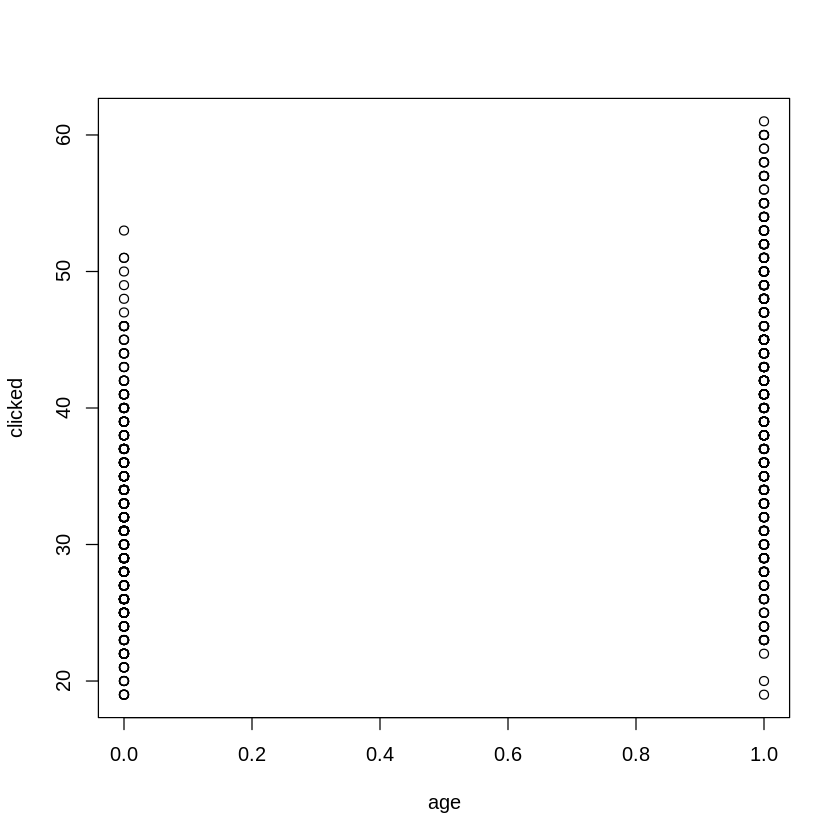

In [ ]:
# scatter plot to show relations between variables
plot(clicked, age, xlab="age", ylab="clicked")
# no relations between the 2

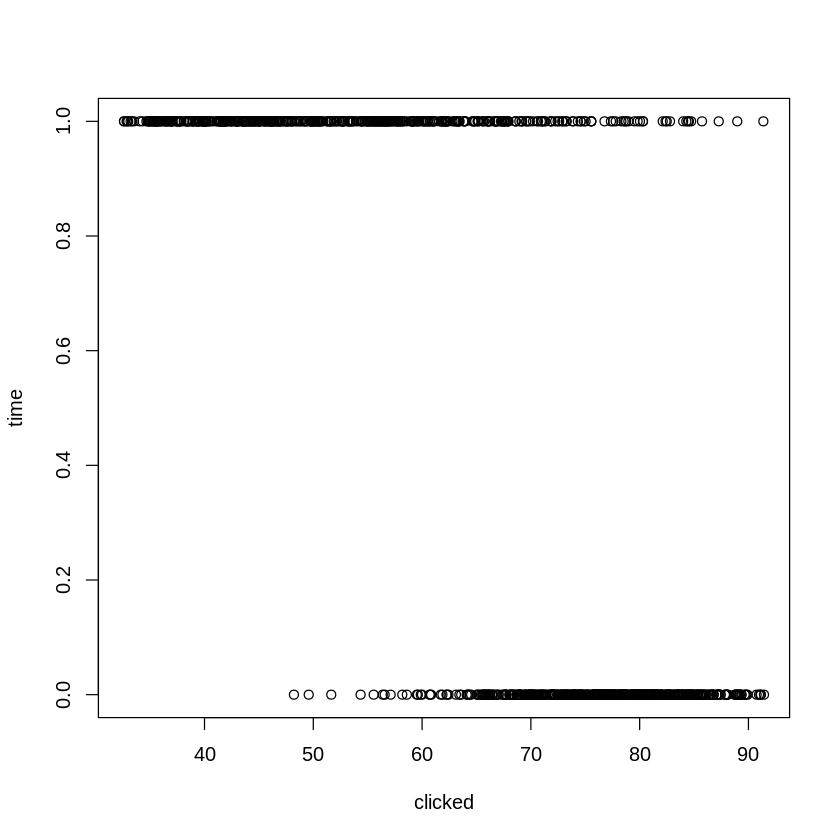

In [ ]:
plot(time, clicked, xlab="clicked", ylab="time")


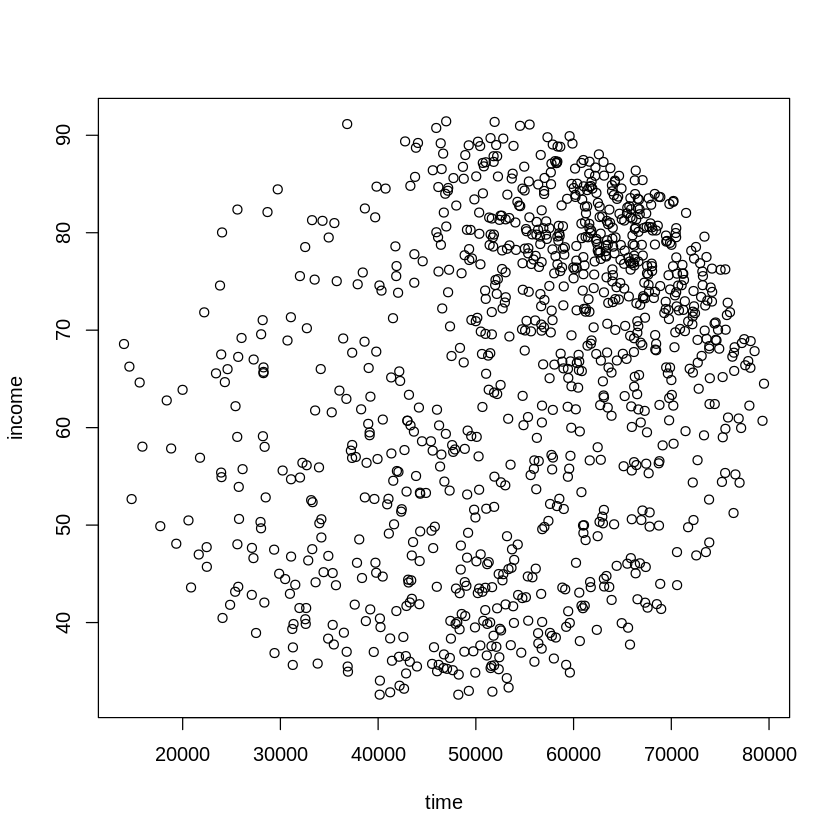

In [ ]:
income <- data$`Area Income`
plot(income, time, xlab="time", ylab="income")

# no linear relationshi between the time spent on site and the income of the area

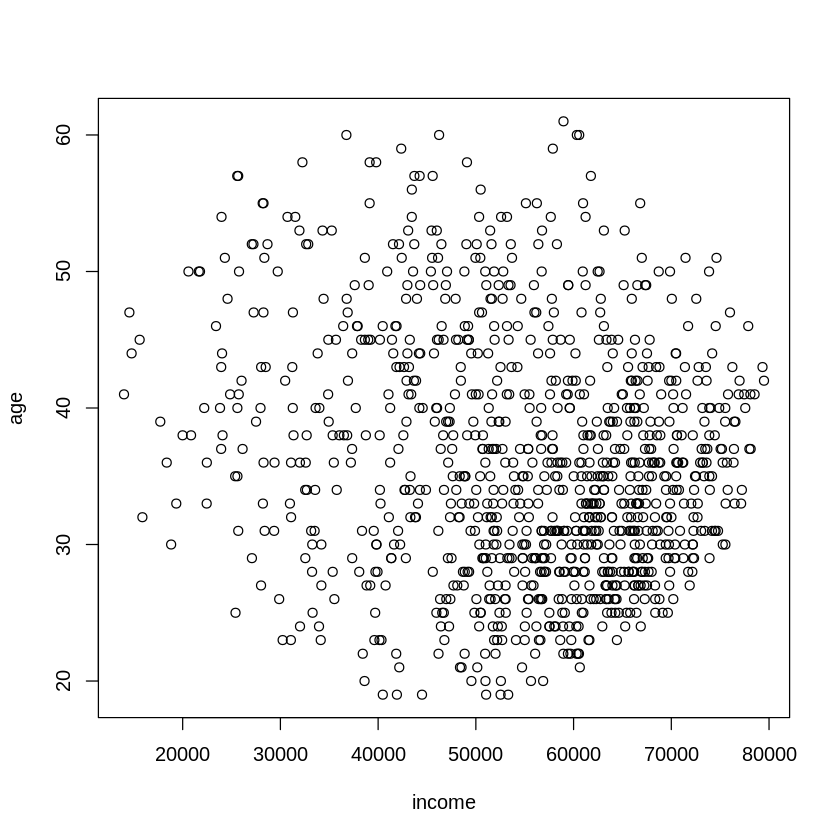

In [ ]:
plot(income, age, xlab="income", ylab="age")

# no relation either

# 7. **Data appropriateness**

The data provided was appropriate. However, maybe focusing on variables that might positively correlate with the frequency on clicking on the ad would bring about better results.

**# 8. Conclusions and reccomendations**




Based on the analysis unfortunately the number of the people that might click on the advert are less. There is a positive correlation between the age and number of clicks. people in their thirties will most likely click on the advert. Most of the variables had no correlations however on their frequency to clicking the advert. They were negatively correlated.

# **Decision Trees to classify the group of Customers most likely to click on the Advert**

In [1]:
df <- read.csv("advertising.csv")
head(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
2,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
3,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
4,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
5,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
6,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0


In [2]:
tail(df)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Ad.Topic.Line,City,Male,Country,Timestamp,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
995,43.70,28,63126.96,173.01,Front-line bifurcated ability,Nicholasland,0,Mayotte,2016-04-04 03:57:48,1
996,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
997,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
998,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
999,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
1000,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [3]:
# checking the columns in the dataset
names(df)

[1] "Daily.Time.Spent.on.Site" "Age"                     
 [3] "Area.Income"              "Daily.Internet.Usage"    
 [5] "Ad.Topic.Line"            "City"                    
 [7] "Male"                     "Country"                 
 [9] "Timestamp"                "Clicked.on.Ad"

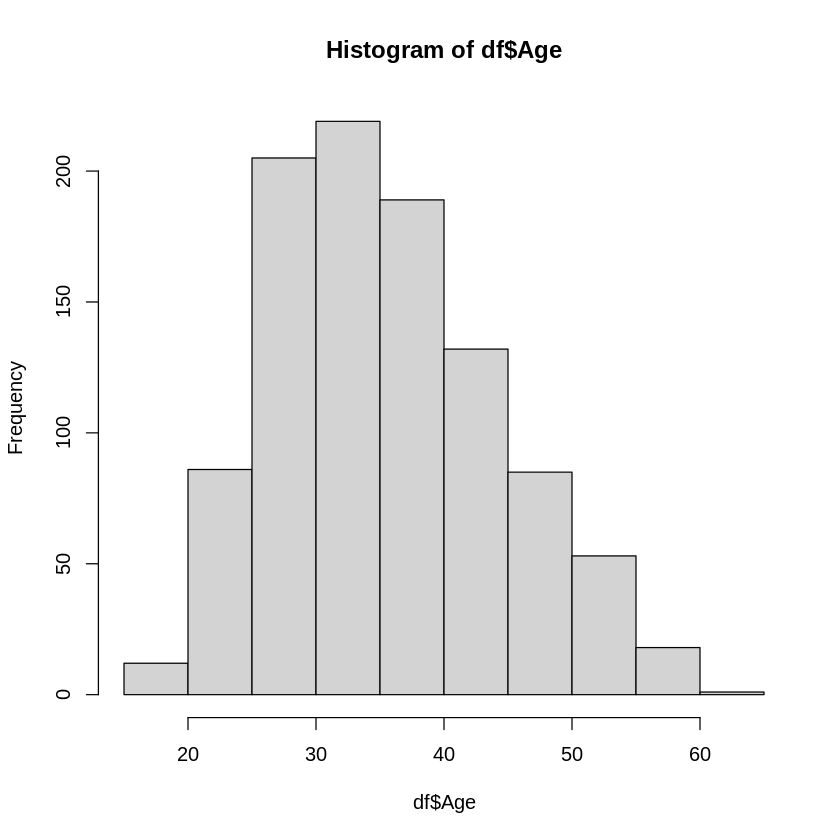

In [4]:
#Histogram on age
hist(df$Age)

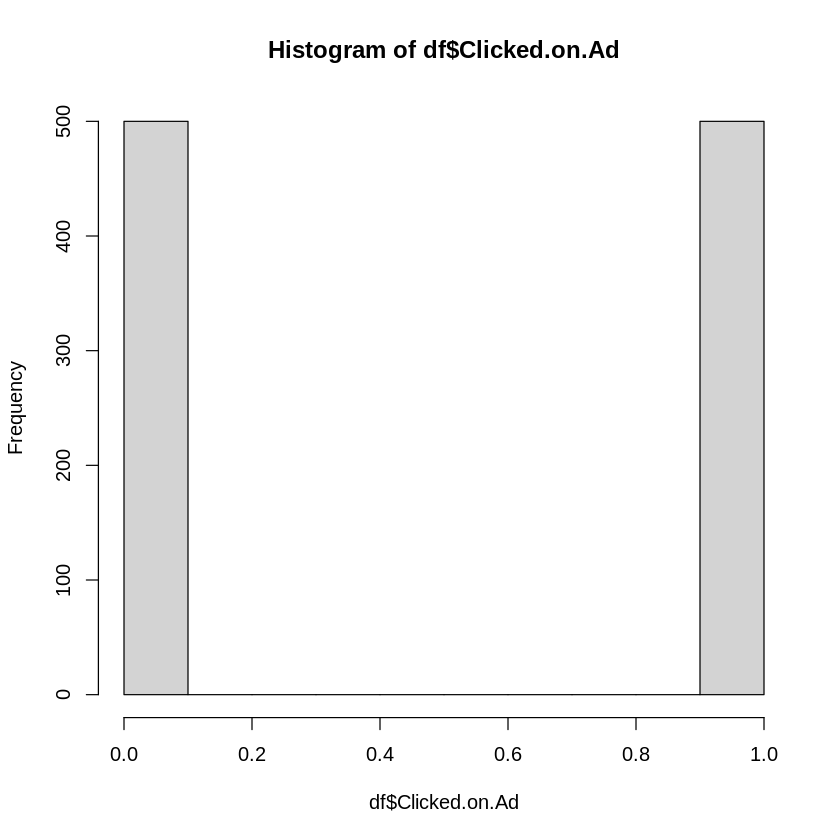

In [ ]:
hist(df$Clicked.on.Ad)

In [4]:
cols.dont.want <- c("Ad.Topic.Line", "City", "Country", "Timestamp") # if you want to remove multiple columns

ad <- df[, ! names(df) %in% cols.dont.want, drop = F]

In [8]:
head(ad)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
1,68.95,35,61833.90,256.09,0,0
2,80.23,31,68441.85,193.77,1,0
3,69.47,26,59785.94,236.50,0,0
4,74.15,29,54806.18,245.89,1,0
5,68.37,35,73889.99,225.58,0,0
6,59.99,23,59761.56,226.74,1,0


In [11]:
install.packages("plyr")
install.packages("dplyr")
library(plyr)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [12]:
#Creating classes for clicked on Ad column
#

require(plyr)
require(dplyr)

ad$Clicked.on.Ad <- as.character(ad$Clicked.on.Ad)
ad$Clicked.on.Ad <- revalue(ad$Clicked.on.Ad, c("0"="No_Click", "1"="Click"))

head(ad)

,Daily.Time.Spent.on.Site,Age,Area.Income,Daily.Internet.Usage,Male,Clicked.on.Ad
,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
1,68.95,35,61833.90,256.09,0,No_Click
2,80.23,31,68441.85,193.77,1,No_Click
3,69.47,26,59785.94,236.50,0,No_Click
4,74.15,29,54806.18,245.89,1,No_Click
5,68.37,35,73889.99,225.58,0,No_Click
6,59.99,23,59761.56,226.74,1,No_Click


In [13]:
#Importing  libraries

install.packages("caret")
install.packages("rpart.plot")
library(caret)
library(rpart.plot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice

Loading required package: ggplot2

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Loading required package: rpart



In [16]:
#Spliting the Dataset
colnames(ad) <- make.names(colnames(ad))
set.seed(123)
intrain <- createDataPartition(ad$Clicked.on.Ad, p= 0.8, list = FALSE)
training <- ad[intrain,]
testing <- ad[-intrain,]

In [17]:
# Check dimensions of train & test set

dim(training)
dim(testing)

[1] 800   6

[1] 200   6

In [18]:
#Training the decision Tree classifier with criterion as information gain

install.packages("e1071")
trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
set.seed(3333)
dtree_fit <- train(Clicked.on.Ad ~., data = training, method = "rpart",
                   parms = list(split = "information"),
                   trControl=trctrl,
                   tuneLength = 10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [19]:
#Trained decision tree classifier results
#

dtree_fit

CART 

800 samples
  5 predictor
  2 classes: 'Click', 'No_Click' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 720, 720, 720, 720, 720, 720, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.00000000  0.9495833  0.8991667
  0.09138889  0.9075000  0.8150000
  0.18277778  0.9045833  0.8091667
  0.27416667  0.9045833  0.8091667
  0.36555556  0.9045833  0.8091667
  0.45694444  0.9045833  0.8091667
  0.54833333  0.9045833  0.8091667
  0.63972222  0.9045833  0.8091667
  0.73111111  0.9045833  0.8091667
  0.82250000  0.6495833  0.2991667

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.

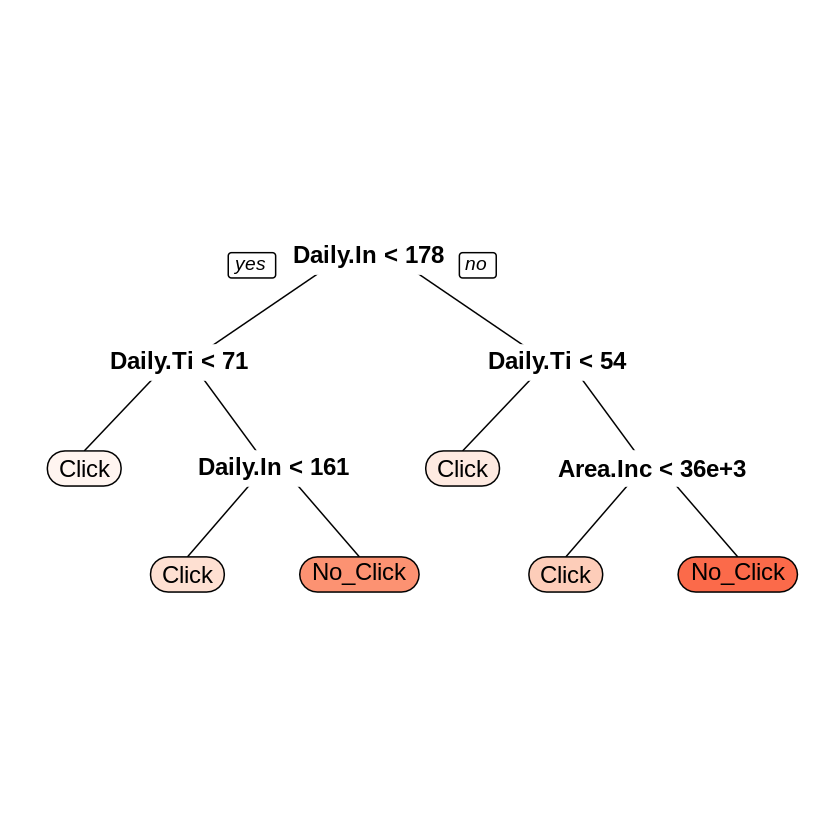

In [20]:
#Visualizing the decision tree
#
	
prp(dtree_fit$finalModel, box.palette = "Reds", tweak = 1.2)

In [21]:
#Making predictions
#

test_pred <- predict(dtree_fit, newdata = testing)

In [22]:

#Checking the acccuracy
#

Click <- as.factor(testing$Clicked.on.Ad)
confusionMatrix(test_pred, Click)

Confusion Matrix and Statistics

          Reference
Prediction Click No_Click
  Click       94        5
  No_Click     6       95
                                          
               Accuracy : 0.945           
                 95% CI : (0.9037, 0.9722)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.89            
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9400          
            Specificity : 0.9500          
         Pos Pred Value : 0.9495          
         Neg Pred Value : 0.9406          
             Prevalence : 0.5000          
         Detection Rate : 0.4700          
   Detection Prevalence : 0.4950          
      Balanced Accuracy : 0.9450          
                                          
       'Positive' Class : Click           
         

The decision tree classifier had an accuracy level of 94.5%

# **Support Vector Machine (SVM)**

In [23]:

#Checking on initial split dataset
#

dim(training);dim(testing)


[1] 800   6

[1] 200   6

In [24]:
#Training the algorithm
#
install.packages("kernlab")
library(kernlab)


trctrl <- trainControl(method = "repeatedcv", number = 10, repeats = 3)
svm_Linear <- train(Clicked.on.Ad ~., data = training, method = "svmLinear",
trControl=trctrl,
preProcess = c("center", "scale"),
tuneLength = 10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘kernlab’


The following object is masked from ‘package:ggplot2’:

    alpha




In [26]:
#Making predictions
#
test_pred <- predict(svm_Linear, newdata = testing)


In [27]:
#Checking the accuracy of the model
#

confusionMatrix(table(test_pred, Click))

Confusion Matrix and Statistics

          Click
test_pred  Click No_Click
  Click       94        2
  No_Click     6       98
                                          
               Accuracy : 0.96            
                 95% CI : (0.9227, 0.9826)
    No Information Rate : 0.5             
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.92            
                                          
 Mcnemar's Test P-Value : 0.2888          
                                          
            Sensitivity : 0.9400          
            Specificity : 0.9800          
         Pos Pred Value : 0.9792          
         Neg Pred Value : 0.9423          
             Prevalence : 0.5000          
         Detection Rate : 0.4700          
   Detection Prevalence : 0.4800          
      Balanced Accuracy : 0.9600          
                                          
       'Positive' Class : Click           
             

SVM produced an accuracy of 96% in making the predictions

# **Conclusions and Reccommendation**

SVM produced a higher accuracy in making the predictions compared to Decision  Trees hence its a better method.